# STEP 1 - Basic OFDM chain

We will simulate a basic ofdm chain on a AWGN channel
https://dspillustrations.com/pages/posts/misc/python-ofdm-example.html

In [1]:
proute = 1

#HONTEUX PLAGIAT DE CE SITE/
"""https://dspillustrations.com/pages/posts/misc/python-ofdm-example.html"""

import numpy as np
import matplotlib.pyplot as plt

allCarriers:   [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
dataCarriers:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 11

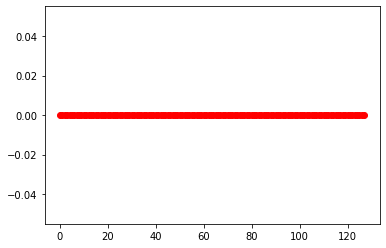

In [2]:

#######################TRANSMISSION CARACTERISTICS##########################

K = 128 # number of OFDM subcarriers
CP = 16  # length of the cyclic prefix: 25% of the block
P = 8 # number of pilot carriers per OFDM block
#pilotValue = 3+3j # The known value each pilot transmits

allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])


# data carriers are all remaining carriers
dataCarriers = allCarriers

print ("allCarriers:   %s" % allCarriers)

print ("dataCarriers:  %s" % dataCarriers)
# plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')


mu = 2 # bits per symbol (i.e. 4QAM)
payloadBits_per_OFDM = K*mu  # number of payload bits per OFDM symbol

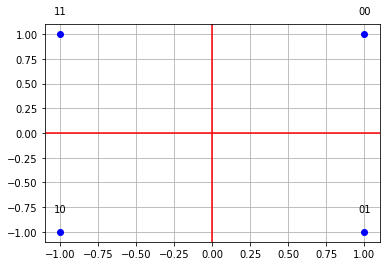

In [3]:

#######################CONSTELLATION##########################
mapping_table = {
    (1,0) : -1-1j,
    (1,1) : -1+1j,
    (0,1) :  1-1j,
    (0,0) :  1+1j
}
for b1 in [0, 1]:
    for b0 in [0, 1]:
        B = ( b1, b0)
        Q = mapping_table[B]
        plt.plot(Q.real, Q.imag, 'bo')
        plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
                
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # y = 0
plt.grid()
plt.show()                   

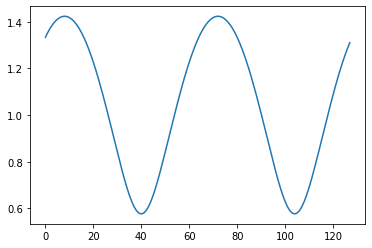

In [6]:
#######################CHANNEL RESPONSE##########################
                
channelResponse = np.array([1, 0, 0.3+0.3j])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, K)
plt.plot(allCarriers, abs(H_exact))
plt.show()   
SNRdb = 25  # signal to noise-ratio in dB at the receiver

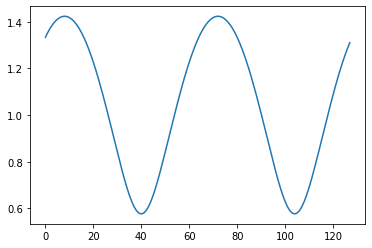

In [7]:

#######################CHANNEL RESPONSE##########################
                
channelResponse = np.array([1, 0, 0.3+0.3j])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, K)
plt.plot(allCarriers, abs(H_exact))
plt.show()   
SNRdb = 25  # signal to noise-ratio in dB at the receiver

In [8]:

#######################RANDOM SYMBOLS##########################

bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
print ("Bits count: ", len(bits))
print ("First 20 bits: ", bits[:20])
print ("Mean of bits (should be around 0.5): ", np.mean(bits))
    


Bits count:  256
First 20 bits:  [0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0]
Mean of bits (should be around 0.5):  0.50390625


In [9]:


#######################SERIAL->PARALLEL##########################
"""
On met par paquet la séquence précédemment créée (paquet de 4 car 1symb = 4 bits
"""
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))
bits_SP = SP(bits)
print ("First 5 bit groups")
print (bits_SP[:5,:])


First 5 bit groups
[[0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]]


In [10]:

#######################MAPPING##########################

def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
QAM = Mapping(bits_SP)
print ("First 5 QAM symbols and bits:")
print (bits_SP[:5,:])
print (QAM[:5])

First 5 QAM symbols and bits:
[[0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]]
[ 1.-1.j -1.+1.j  1.-1.j -1.+1.j  1.-1.j]


In [12]:
def OFDM_symbol(QAM_payload):
    symbol = np.zeros(K, dtype=complex) # the overall K subcarriers
    #symbol[pilotCarriers] = pilotValue  # allocate the pilot subcarriers 
    symbol[dataCarriers] = QAM_payload  # allocate the pilot subcarriers
    return symbol
OFDM_data = OFDM_symbol(QAM)
print ("Number of OFDM carriers in frequency domain: ", len(OFDM_data))

Number of OFDM carriers in frequency domain:  128


In [13]:
def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)
OFDM_time = IDFT(OFDM_data)
print ("Number of OFDM samples in time-domain before CP: ", len(OFDM_time))

Number of OFDM samples in time-domain before CP:  128


In [14]:
def addCP(OFDM_time):
    cp = OFDM_time[-CP:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning
OFDM_withCP = addCP(OFDM_time)
print ("Number of OFDM samples in time domain with CP: ", len(OFDM_withCP))

Number of OFDM samples in time domain with CP:  144


RX Signal power: 0.0179. Noise power: 0.0001


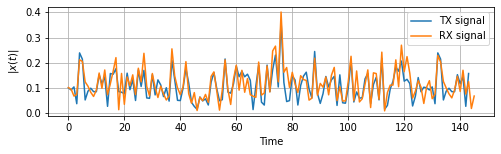

In [16]:
def channel(signal):
    convolved = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    
    print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
    
    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved + noise
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)
plt.figure(figsize=(8,2))
plt.plot(abs(OFDM_TX), label='TX signal')
plt.plot(abs(OFDM_RX), label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('Time'); plt.ylabel('$|x(t)|$');
plt.grid(True);

In [17]:
def removeCP(signal):
    return signal[CP:(CP+K)]
OFDM_RX_noCP = removeCP(OFDM_RX)

In [18]:
def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod = DFT(OFDM_RX_noCP)

# CHANNEL esitimate not done

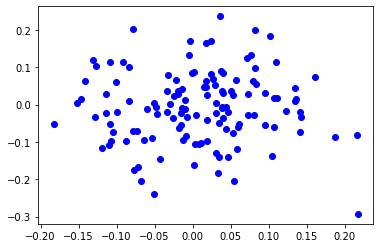

In [24]:
def get_payload(equalized):
    return equalized[dataCarriers]
QAM_est = get_payload(OFDM_withCP)
plt.plot(QAM_est.real, QAM_est.imag, 'bo');